In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD
from livelossplot import PlotLossesKeras

MODEL_WEIGHT_FILE = 'cnn_2.h5'
MODEL_JSON_FILE = 'cnn_2.json'
IMAGE_SIZE = (224, 224)
INPUT_SHAPE = (224, 224, 3)
EPOCHS = 50
BATCH_SIZE = 64
TRAINING_DATA = 'data/training'
VALIDATION_DATA = 'data/validation'
CLASS_MODE = 'binary'

Using TensorFlow backend.


In [2]:
# Load Data
training_data_generator = ImageDataGenerator(rescale=1./255)

validation_data_generator = ImageDataGenerator(rescale=1./255)

training_generator = training_data_generator.flow_from_directory(
    TRAINING_DATA,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE
)
validation_generator = validation_data_generator.flow_from_directory(
    VALIDATION_DATA,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [3]:
# Setup Model
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=INPUT_SHAPE, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Add new fully connected layer
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model = Model(inputs=model.inputs, outputs=output)

# Compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Save model architecture
with open(MODEL_JSON_FILE,"w") as f:
    f.write(model.to_json())

C:\Users\hyckenan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\hyckenan\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  import sys


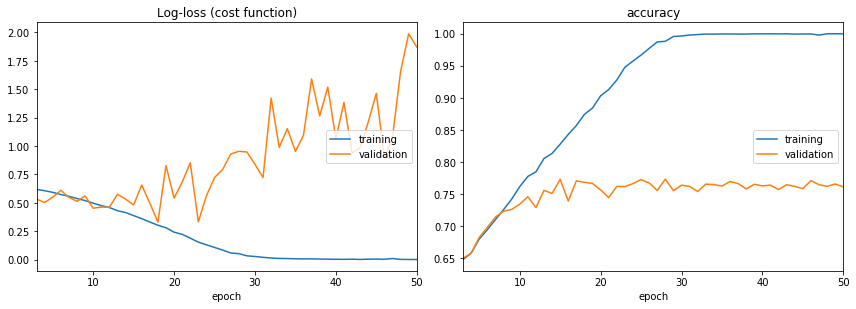

Log-loss (cost function):
training   (min:    0.001, max:    0.673, cur:    0.001)
validation (min:    0.331, max:    1.988, cur:    1.872)

accuracy:
training   (min:    0.577, max:    1.000, cur:    1.000)
validation (min:    0.587, max:    0.773, cur:    0.761)


In [4]:
# Training
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesKeras()], 
    verbose=1
)

model.save_weights(MODEL_WEIGHT_FILE)